# 피마족 인디언 당뇨병 발병 유무를 예측하는 이진분류

*   당뇨병발생(1), 정상(0)
*   https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database



## 데이터 준비하기

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split

np.random.seed(5)

In [ ]:
dataset = pd.read_csv('/content/diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## outcome 컬럼(label) 비율 확인

In [ ]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

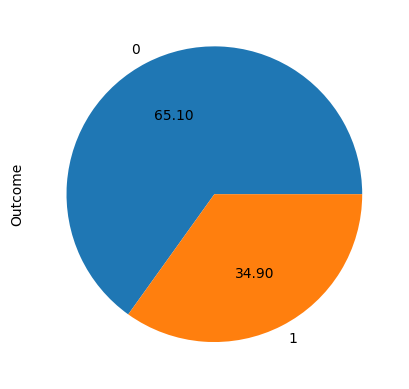

In [ ]:
dataset['Outcome'].value_counts().plot.pie(autopct='%.2f');

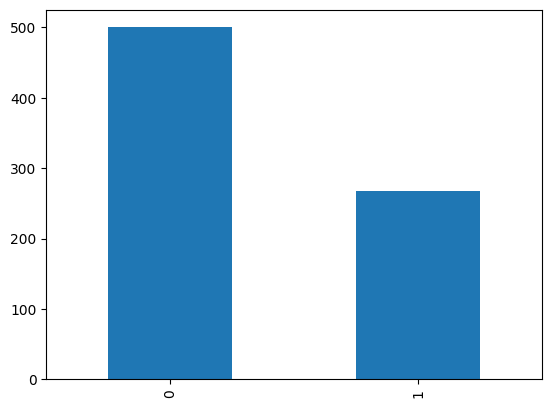

In [ ]:
dataset['Outcome'].value_counts().plot.bar();

## 데이터 분리하기

In [ ]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
y = dataset[dataset.columns[-1]]

In [ ]:
X = dataset[dataset.columns[:-1]]

### 훈련셋과 테스트셋으로 분리

In [ ]:
# 훈련과 테스트 비율 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state = 7, stratify=y)

print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)

X_train.shape (614, 8)
X_test.shape (154, 8)


## 모델 구성하기

In [ ]:
# from keras.layers.attention.multi_head_attention import activation
model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                288       
                                                                 
 dense_13 (Dense)            (None, 8)                 264       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


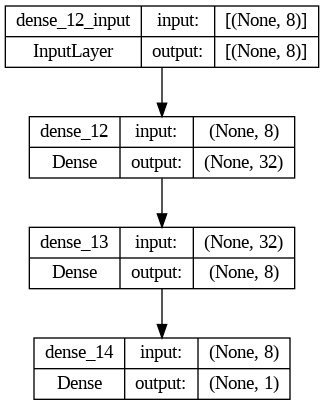

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)

## 모델 설정하기

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

## 모델 학습하기

In [ ]:
history = model.fit(X_train, y_train, epochs=1500, batch_size=128)

Epoch 1/1500
5/5 [==============================] - 2s 8ms/step - loss: 11.8985 - acc: 0.6547
Epoch 2/1500
5/5 [==============================] - 0s 6ms/step - loss: 8.3843 - acc: 0.6156
Epoch 3/1500
5/5 [==============================] - 0s 6ms/step - loss: 6.5116 - acc: 0.5147
Epoch 4/1500
5/5 [==============================] - 0s 8ms/step - loss: 4.3770 - acc: 0.5130
Epoch 5/1500
5/5 [==============================] - 0s 7ms/step - loss: 2.1787 - acc: 0.5440
Epoch 6/1500
5/5 [==============================] - 0s 6ms/step - loss: 1.4109 - acc: 0.5912
Epoch 7/1500
5/5 [==============================] - 0s 4ms/step - loss: 1.5936 - acc: 0.6091
Epoch 8/1500
5/5 [==============================] - 0s 4ms/step - loss: 1.6182 - acc: 0.6352
Epoch 9/1500
5/5 [==============================] - 0s 4ms/step - loss: 1.3515 - acc: 0.6352
Epoch 10/1500
5/5 [==============================] - 0s 4ms/step - loss: 1.1024 - acc: 0.6189
Epoch 11/1500
5/5 [==============================] - 0s 5ms/step - l

## 학습결과 그려보기

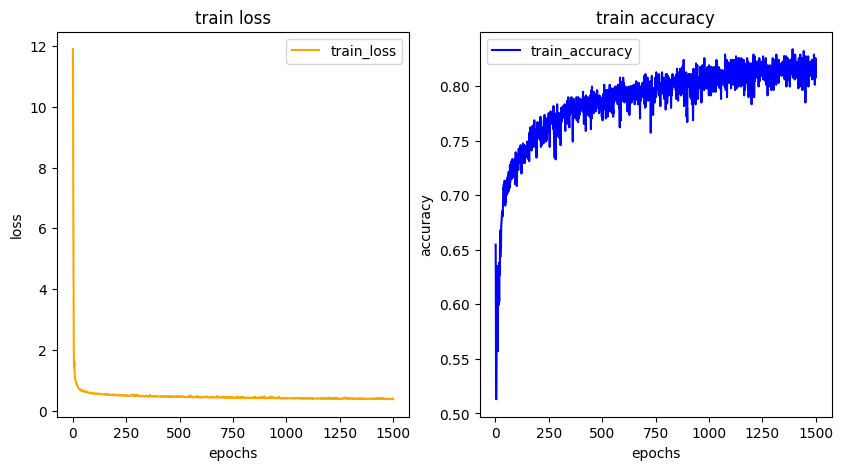

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

## 모델 평가하기

In [ ]:
scores = model.evaluate(X_test, y_test)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.4900 - acc: 0.7338
acc: 73.38%


In [ ]:
scores

[0.489956796169281, 0.7337662577629089]

## 성능평가

In [ ]:
from sklearn import metrics

y_pred = model.predict(X_test)
preds_1d = y_pred.flatten()
pred_class = np.where(preds_1d > 0.5, 1, 0) # 0.5보다 크면 1, 작으면 0

print('accuracy : ', metrics.accuracy_score(y_test, pred_class))
print('precision : ', metrics.precision_score(y_test, pred_class))
print('recall : ', metrics.recall_score(y_test, pred_class))
print('f1 : ', metrics.f1_score(y_test, pred_class))

5/5 [==============================] - 0s 3ms/step
accuracy :  0.7337662337662337
precision :  0.6511627906976745
recall :  0.5185185185185185
f1 :  0.577319587628866


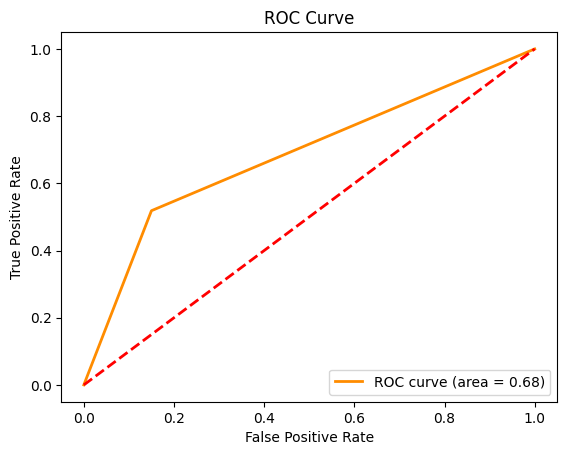

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_A, tpr_A, thr_A = roc_curve(y_test, pred_class)

auc_A = auc(fpr_A, tpr_A)

import matplotlib.pyplot as plt

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


plt.plot(fpr_A, tpr_A, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc_A)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc="lower right")
plt.show()